<a href="https://colab.research.google.com/github/rajn5181/LearnPlatform-COVID-19-Impact-on-Digital-Learning/blob/main/LearnPlatform%20COVID-19%20Impact%20on%20Digital%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
!git clone https://github.com/rajn5181/LearnPlatform-COVID-19-Impact-on-Digital-Learning.git

fatal: destination path 'LearnPlatform-COVID-19-Impact-on-Digital-Learning' already exists and is not an empty directory.


In [3]:
district=pd.read_csv('/content/LearnPlatform-COVID-19-Impact-on-Digital-Learning/districts_info[1].csv')
products=pd.read_csv('/content/LearnPlatform-COVID-19-Impact-on-Digital-Learning/products_info[1].csv')

In [4]:
district.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
products.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [6]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [7]:
district.shape

(233, 7)

In [8]:
district.describe

<bound method NDFrame.describe of      district_id       state  ... county_connections_ratio    pp_total_raw
0           8815    Illinois  ...                [0.18, 1[  [14000, 16000[
1           2685         NaN  ...                      NaN             NaN
2           4921        Utah  ...                [0.18, 1[    [6000, 8000[
3           3188         NaN  ...                      NaN             NaN
4           2238         NaN  ...                      NaN             NaN
..           ...         ...  ...                      ...             ...
228         9515    New York  ...                [0.18, 1[  [18000, 20000[
229         8103   Tennessee  ...                [0.18, 1[   [8000, 10000[
230         4929    Virginia  ...                [0.18, 1[  [12000, 14000[
231         7975  California  ...                [0.18, 1[             NaN
232         7164  California  ...                [0.18, 1[             NaN

[233 rows x 7 columns]>

In [9]:
district.isnull().sum(axis=0).sort_values()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
county_connections_ratio     71
pct_free/reduced             85
pp_total_raw                115
dtype: int64

In [10]:
d_rows=district.isnull().sum(axis=1).sort_values(ascending=False)

In [11]:
district.columns

Index(['district_id', 'state', 'locale', 'pct_black/hispanic',
       'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw'],
      dtype='object')

In [12]:
district=district.drop(['pp_total_raw'],axis=1)


In [13]:
district.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1["
1,2685,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1["
3,3188,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN


In [14]:
district_numeric = district.select_dtypes(include=[np.number])
numeric_cols = district_numeric.columns.values
print(numeric_cols)

['district_id']


In [15]:
district_numeric = district.select_dtypes(exclude=[np.number])
numeric_cols = district_numeric.columns.values
print(numeric_cols)

['state' 'locale' 'pct_black/hispanic' 'pct_free/reduced'
 'county_connections_ratio']


In [16]:
for col in district.columns:
    pct_missing = np.mean(district[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

district_id - 0%
state - 24%
locale - 24%
pct_black/hispanic - 24%
pct_free/reduced - 36%
county_connections_ratio - 30%


In [17]:
for col in products.columns:
    pct_missing = np.mean(products[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

LP ID - 0%
URL - 0%
Product Name - 0%
Provider/Company Name - 0%
Sector(s) - 5%
Primary Essential Function - 5%


In [18]:
products['LP ID'].value_counts().sum()

372

In [19]:
df=district.isnull().any(axis=1)

In [20]:
df.index

RangeIndex(start=0, stop=233, step=1)

In [21]:
df.values

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False,  True,  True, False, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
        True,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False,  True,

In [22]:
df.index[df.values]

Int64Index([  1,   3,   4,  10,  13,  14,  17,  19,  23,  25,  28,  29,  30,
             31,  32,  39,  40,  43,  46,  49,  60,  63,  68,  70,  73,  74,
             75,  76,  77,  81,  86,  87,  88,  92,  93,  96,  99, 100, 101,
            103, 106, 107, 108, 110, 117, 120, 125, 127, 133, 136, 137, 138,
            143, 145, 149, 153, 155, 156, 158, 159, 160, 162, 164, 166, 167,
            168, 174, 176, 177, 181, 182, 185, 186, 187, 188, 189, 190, 193,
            199, 203, 205, 207, 208, 209, 210, 211, 212, 215, 216, 219, 222,
            223, 225, 226, 229],
           dtype='int64')

In [23]:
index=df.index[df.values]
index

Int64Index([  1,   3,   4,  10,  13,  14,  17,  19,  23,  25,  28,  29,  30,
             31,  32,  39,  40,  43,  46,  49,  60,  63,  68,  70,  73,  74,
             75,  76,  77,  81,  86,  87,  88,  92,  93,  96,  99, 100, 101,
            103, 106, 107, 108, 110, 117, 120, 125, 127, 133, 136, 137, 138,
            143, 145, 149, 153, 155, 156, 158, 159, 160, 162, 164, 166, 167,
            168, 174, 176, 177, 181, 182, 185, 186, 187, 188, 189, 190, 193,
            199, 203, 205, 207, 208, 209, 210, 211, 212, 215, 216, 219, 222,
            223, 225, 226, 229],
           dtype='int64')

In [24]:
district.iloc[index,:]  #rows having atleast one missing values

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio
1,2685,NaN,NaN,NaN,NaN,NaN
3,3188,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN
10,1044,Missouri,Suburb,"[0, 0.2[","[0, 0.2[",NaN
13,5527,Massachusetts,Suburb,"[0, 0.2[",NaN,NaN
...,...,...,...,...,...,...
222,9463,NaN,NaN,NaN,NaN,NaN
223,9303,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1["
225,1965,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1["
226,5882,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1["


In [41]:
district[district.isnull().sum(axis=1)>4]    #missing values of more than four missing values

,district_id,state,locale


In [26]:
len(district[district.isnull().sum(axis=1)>4])/len(district)*100   #percentage of data with missing value more than ~25%

24.463519313304722

In [27]:
district=district[district.isnull().sum(axis=1)<5]

In [28]:
for col in district.columns:
  pct_missing=np.mean(district[col].isnull())
  print('{}--{}%'.format(col,round(pct_missing)*100))

district_id--0%
state--0%
locale--0%
pct_black/hispanic--0%
pct_free/reduced--0%
county_connections_ratio--0%


In [29]:
district.isnull().sum()/len(district)*100

district_id                  0.000000
state                        0.000000
locale                       0.000000
pct_black/hispanic           0.000000
pct_free/reduced            15.909091
county_connections_ratio     7.954545
dtype: float64

In [30]:
district=pd.DataFrame(district,columns=['district_id','state','locale'])
district.reset_index().head()

,index,district_id,state,locale
0,0,8815,Illinois,Suburb
1,2,4921,Utah,Suburb
2,5,5987,Wisconsin,Suburb
3,6,3710,Utah,Suburb
4,7,7177,North Carolina,Suburb


In [31]:
products.isnull().sum()/len(products)*100

LP ID                         0.000000
URL                           0.000000
Product Name                  0.000000
Provider/Company Name         0.268817
Sector(s)                     5.376344
Primary Essential Function    5.376344
dtype: float64

In [32]:
products=products.dropna()

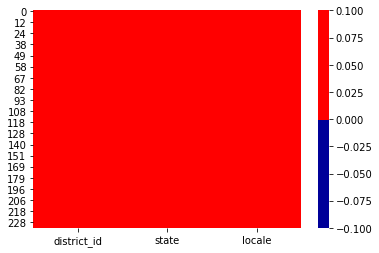

In [34]:
cols=district.columns
colours = ['#000099', '#ff0000'] # specify the colours - yellow is missing. red is not missing.
sns.heatmap(district[cols].isnull(),cmap=colours)

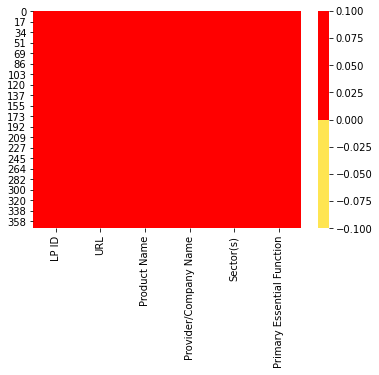

In [35]:
cols=products.columns
colours=['#ffe552','#ff0000']
sns.heatmap(products[cols].isnull(),cmap=colours)

In [33]:
print("District:",district.shape)
print("Products:",products.shape)

District: (176, 3)
Products: (352, 6)


In [38]:
products.iloc[0:176,:]

,index,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...,...
171,175,55032,http://www.ascd.org/professional-development.aspx,ASCD Professional Development Tools,Association for Supervision and Curriculum Dev...,PreK-12,CM - Teacher Resources - Professional Learning
172,176,50692,https://www.schoolmessenger.com,SchoolMessenger,West Corporation,PreK-12,CM - Classroom Engagement & Instruction - Comm...
173,177,73952,http://www.mheducation.com,McGraw-Hill Education,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Courseware & Textbooks
174,178,81236,https://www.box.com/,Box,Box,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other
